## Load data

In [13]:
# Import the dataset loading function from sklearn
from sklearn.datasets import load_digits

# Load the hand-written digits dataset
digits = load_digits()

# Get the images and corresponding labels
images, labels = digits.images, digits.target
images.shape, labels.shape

((1797, 8, 8), (1797,))

## Exploratory data analysis

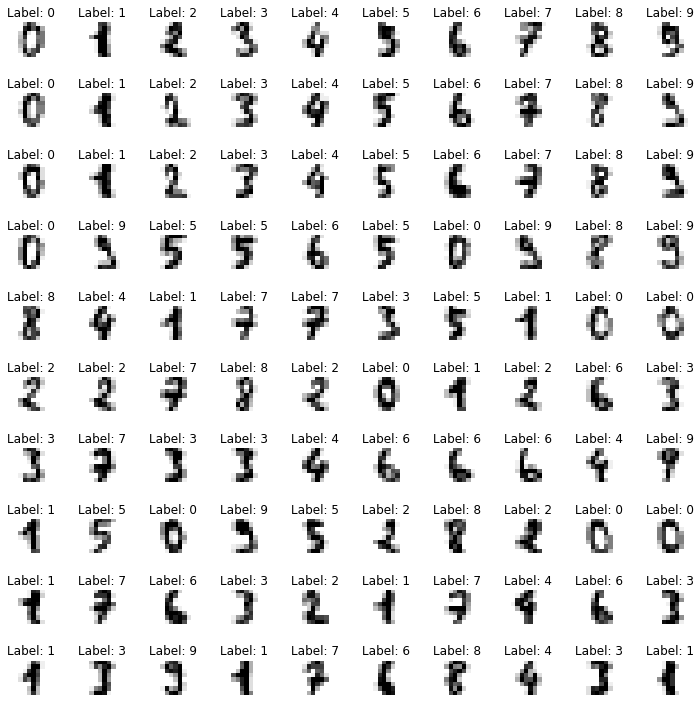

In [51]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot first 100 images
n = 100
_, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(images[i,], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[row, col].set_title('Label: %i' % labels[i])

## Data preprocessing &  feature engineering

In [52]:
# reshape images to vectors
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
X.shape

(1797, 64)

In [55]:
# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, shuffle=False)

print("--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the training data--
 (1437, 64)

--Shape of the testing data--
 (360, 64)


### PCA

In [97]:
n_components = 2
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)

print(X_train.shape)
print(X_train_pca.shape)

(1437, 64)
(1437, 2)


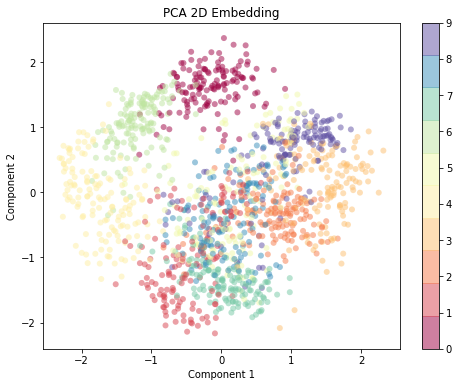

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2D Embedding')
plt.colorbar();

### TSNE

In [120]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train)

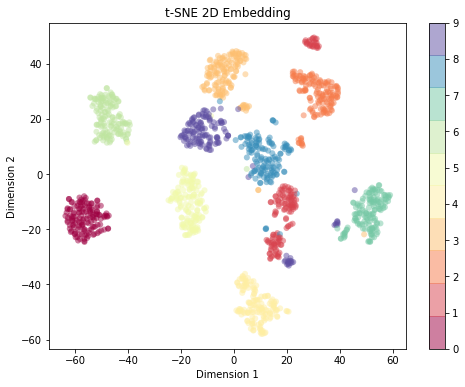

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE 2D Embedding')
plt.colorbar();

## Build up SVM classifier

### Training

In [152]:
# Import library for support vector machine classifier
from sklearn.svm import LinearSVC

# Create a support vector classifier
clf = LinearSVC(C=0.001, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)


LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

### Testing

The prediction accuracy: 90.28 % 



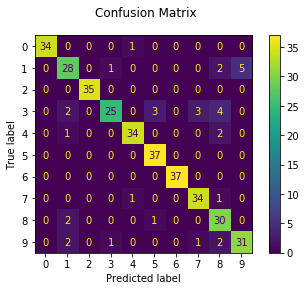

In [153]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Now predict the value of the digit on the test set:
y_pred_test = clf.predict(X_test)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} % \n".format(acc * 100))

# print("Classification report for classifier %s:\n%s\n"
#       % (clf, classification_report(y_test, y_pred_test)))

disp = plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### PCA (16 components) + SVC

### Training

In [168]:
from sklearn.decomposition import PCA
n_components = 64
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)

# plt.hist(pca.explained_variance_ratio_, bins=10, log=True)
# pca.explained_variance_ratio_.sum()


# Create a support vector classifier
clf = LinearSVC(C=0.001, random_state=42)

# Train the model using the training sets
clf.fit(X_train_pca, y_train)

/home/qq/.virtualenvs/book/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

### Testing

The prediction accuracy: 36.11 % 



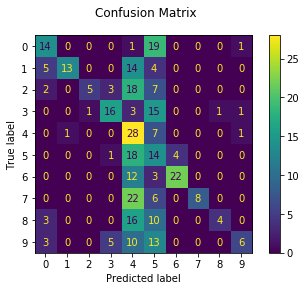

In [169]:
# Now predict the value of the digit on the test set:
X_test_pca = pca.transform(X_test)
y_pred_test = clf.predict(X_test_pca)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} % \n".format(acc * 100))

# print("Classification report for classifier %s:\n%s\n"
#       % (clf, classification_report(y_test, y_pred_test)))

disp = plot_confusion_matrix(clf, X_test_pca, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Fine-Tuning: tune the tree depth hyperparameter in the SVM classifier

## Retrive the best model